In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
import nptdms
from nptdms import TdmsFile
savepath = 'U:/PIV_HSC_11_12_2019/Signal_70_Umin'
path = "U:/PIV_HSC_11_12_2019/Signal_70_Umin"

In [10]:
def writetdms(tdms, num):
    groups = tdms.groups()
    channels = tdms.group_channels(groups[0])
    channel_names = [channel.channel for channel in channels]
    obj = tdms.object(groups[0], channel_names[num])
    data = np.asarray(obj.data)
    

    return data



def datetime_to_float(timesignal):

    t0 = timesignal[0]
    t1 = timesignal[timesignal.shape[0] - 1]
    sec = (t1-t0).total_seconds()
    time = np.linspace(0, sec, timesignal.shape[0])

    return time

In [11]:
size = 128000
tpAr = np.empty(size)
pAr = np.empty(size)

In [12]:
ch = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25)
tdms = TdmsFile(path+'/Messungen_' +str(5)+".tdms")
tp1 = datetime_to_float(writetdms(tdms, ch[0]))
p1 = writetdms(tdms, ch[1])
tp2 = datetime_to_float(writetdms(tdms, ch[2]))
p2 = writetdms(tdms, ch[3])
tp3 = datetime_to_float(writetdms(tdms, ch[4]))
p3 = writetdms(tdms, ch[5])
tp4 = datetime_to_float(writetdms(tdms, ch[6]))
p4 = writetdms(tdms, ch[7])
tpV = datetime_to_float(writetdms(tdms, ch[8]))
pV = writetdms(tdms, ch[9])
tpAr = datetime_to_float(writetdms(tdms, ch[10]))
pAr = writetdms(tdms, ch[11])
t_hub = datetime_to_float(writetdms(tdms, ch[12]))
hub = writetdms(tdms, ch[13])
tpd2 = datetime_to_float(writetdms(tdms, ch[14]))
pd2 = writetdms(tdms, ch[15])
tpd1 = datetime_to_float(writetdms(tdms, ch[16]))
pd1 = writetdms(tdms, ch[17])
tpd5 = datetime_to_float(writetdms(tdms, ch[18]))
pd5 = writetdms(tdms, ch[19])
tpd7 = datetime_to_float(writetdms(tdms, ch[20]))
pd7 = writetdms(tdms, ch[21])
tbsv = datetime_to_float(writetdms(tdms, ch[22]))
bsv = writetdms(tdms, ch[23])
tbsr = datetime_to_float(writetdms(tdms, ch[24]))
bsr = writetdms(tdms, ch[25])

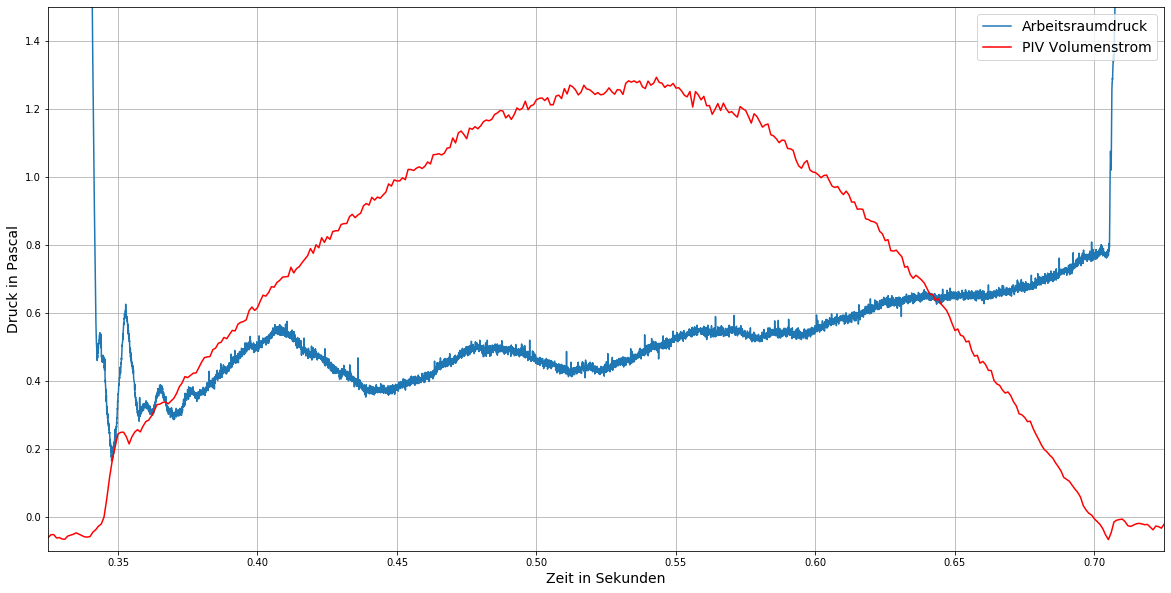

In [132]:
x =np.genfromtxt(path+'/Signal_70_Umin.csv',delimiter=';')

time = x[:,0]
flow = x[:, 1]

#new_time = np.linspace(0, (time[-1000]-time[89500]), time[89500:-1000].shape[0])
plt.figure(figsize=(20, 10))
plt.plot(tpAr[613:]-tpAr[613], pAr[613:]-0.5, label='Arbeitsraumdruck')
plt.ylim(-0.1, 1.5)
#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
#ax2.set_ylim(0e5, 23e5)
plt.plot(time, flow*5,color='red', label='PIV Volumenstrom')
plt.xlabel('Zeit in Sekunden', fontsize='14')
plt.ylabel('Druck in Pascal', fontsize='14')
plt.xlim(0.325,0.725)
plt.legend(fontsize='14', loc='upper right')
plt.grid()
#plt.savefig('L:/023_CavSim_Plots/Simulation_70Umin.png')


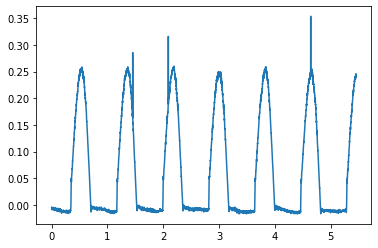